<a href="https://colab.research.google.com/github/kazhar6821/my-repo/blob/main/Sales_Viz_pnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings("ignore")


In [4]:
file_path = 'Sales (2).csv'
data = pd.read_csv(file_path, header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
1,15000,11/14/2023,10.936943084162,15.9,20,218.73886168323,318,99.261138316768,Online,No Discount,Contoso USB Wave Multi-media Keyboard E280 Black,"Contoso, Ltd",Computers Accessories,Computers,North America,Spring,United States
2,14999,1/18/2023,113.23746133376,279,12,1358.8495360051,3348,1989.1504639949,Online,Asian Summer Promotion,Adventure Works LCD20W M240 Black,Adventure Works,Monitors,Computers,Asia,Beijing,China
3,14998,8/2/2022,363.63498583425,588,13,4727.2548158452,7408.8,2681.5451841548,Online,North America Holiday Promotion,"A. Datum SLR Camera 35"" X358 Gold",A. Datum Corporation,Digital SLR Cameras,Cameras and camcorders,North America,Ithaca,United States
4,14997,1/2/2022,55.387212105132,999,10,553.87212105132,9990,9436.1278789487,Online,No Discount,WWI Projector 720p DLP56 White,Wide World Importers,Projectors & Screens,Computers,Europe,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,5,9/27/2022,108.50877679754,304,9,976.57899117782,2614.4,1637.8210088222,Catalog,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China
14997,4,10/24/2023,0.57615326326762,25.69,18,10.370758738817,462.42,452.04924126118,Reseller,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
14998,3,9/20/2021,10.122337684823,159.99,9,91.101039163406,1395.1128,1304.0117608366,Phone,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
14999,2,11/2/2021,7.4917527975493,12.99,4,29.967011190197,50.1414,20.174388809803,In-store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia


In [47]:
column_names = [
    "OrderID", "OrderDate", "UnitPrice", "Cost", "UnitsSold", "Revenue",
    "TotalCost", "Profit", "SalesChannel", "PromotionName", "Product",
    "Manufacturer", "ProductCategory", "ProductSubCategory", "Region",
    "City", "Country"
]


In [6]:
data.columns = column_names


In [81]:
print("Preview of the Dataset:")
print(data.head())

Preview of the Dataset:
  OrderID  OrderDate   UnitPrice   Cost  UnitsSold      Revenue  TotalCost  \
1   15000 2023-11-14   10.936943   15.9       20.0   218.738862      318.0   
2   14999 2023-01-18  113.237461  279.0       12.0  1358.849536     3348.0   
3   14998 2022-08-02  363.634986  588.0       13.0  4727.254816     7408.8   
4   14997 2022-01-02   55.387212  999.0       10.0   553.872121     9990.0   
5   14996 2021-12-16   16.240455   25.0       12.0   194.885455      300.0   

        Profit SalesChannel                    PromotionName  ...  Year Month  \
1    99.261138       Online                      No Discount  ...  2023    11   
2  1989.150464       Online           Asian Summer Promotion  ...  2023     1   
3  2681.545184       Online  North America Holiday Promotion  ...  2022     8   
4  9436.127879       Online                      No Discount  ...  2022     1   
5   105.114545       Online           Asian Summer Promotion  ...  2021    12   

  Day ProfitMargin S

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
categorical_columns = ["SalesChannel", "PromotionName", "Product", "Manufacturer",
                       "ProductCategory", "ProductSubCategory", "Region", "City", "Country"]
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that all missing values have been handled
print("\nMissing Values in Each Column After Cleaning:")
print(data.isnull().sum())



Missing Values in Each Column After Cleaning:
OrderID               0
OrderDate             0
UnitPrice             0
Cost                  0
UnitsSold             0
Revenue               0
TotalCost             0
Profit                0
SalesChannel          0
PromotionName         0
Product               0
Manufacturer          0
ProductCategory       0
ProductSubCategory    0
Region                0
City                  0
Country               0
Year                  0
Month                 0
Day                   0
ProfitMargin          0
Scaled_UnitPrice      1
Scaled_Cost           1
Scaled_UnitsSold      1
Scaled_Revenue        1
Scaled_TotalCost      1
Scaled_Profit         1
dtype: int64


In [87]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'], errors='coerce')
data.dropna(subset=['OrderDate'], inplace=True)
data['Year'] = data['OrderDate'].dt.year
data['Month'] = data['OrderDate'].dt.month
data['Day'] = data['OrderDate'].dt.day
data['ProfitMargin'] = (data['Profit'] / data['Revenue']) * 100


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_columns])
scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns)
for col in numeric_columns:
    data[f"Scaled_{col}"] = scaled_data[col]
    print("\nSummary Statistics for Numeric Columns:")
print(data[numeric_columns].describe())



Summary Statistics for Numeric Columns:

Summary Statistics for Numeric Columns:

Summary Statistics for Numeric Columns:

Summary Statistics for Numeric Columns:

Summary Statistics for Numeric Columns:

Summary Statistics for Numeric Columns:
          UnitPrice          Cost     UnitsSold       Revenue     TotalCost  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean     124.425132    296.514697     16.741733   1586.954833   3692.783986   
std      163.569912    345.985232     43.490032   2408.961430   4917.886955   
min        0.001576      0.950000      4.000000      0.015756      4.750000   
25%       16.847345     59.000000      9.000000    189.677420    645.000000   
50%       69.688876    205.000000     10.000000    752.752320   2301.175750   
75%      164.348636    366.000000     13.000000   2006.030237   4767.720000   
max     1896.133845   2899.990000   1560.000000  42991.137192  78312.000000   

             Profit  
count  15000.000000 

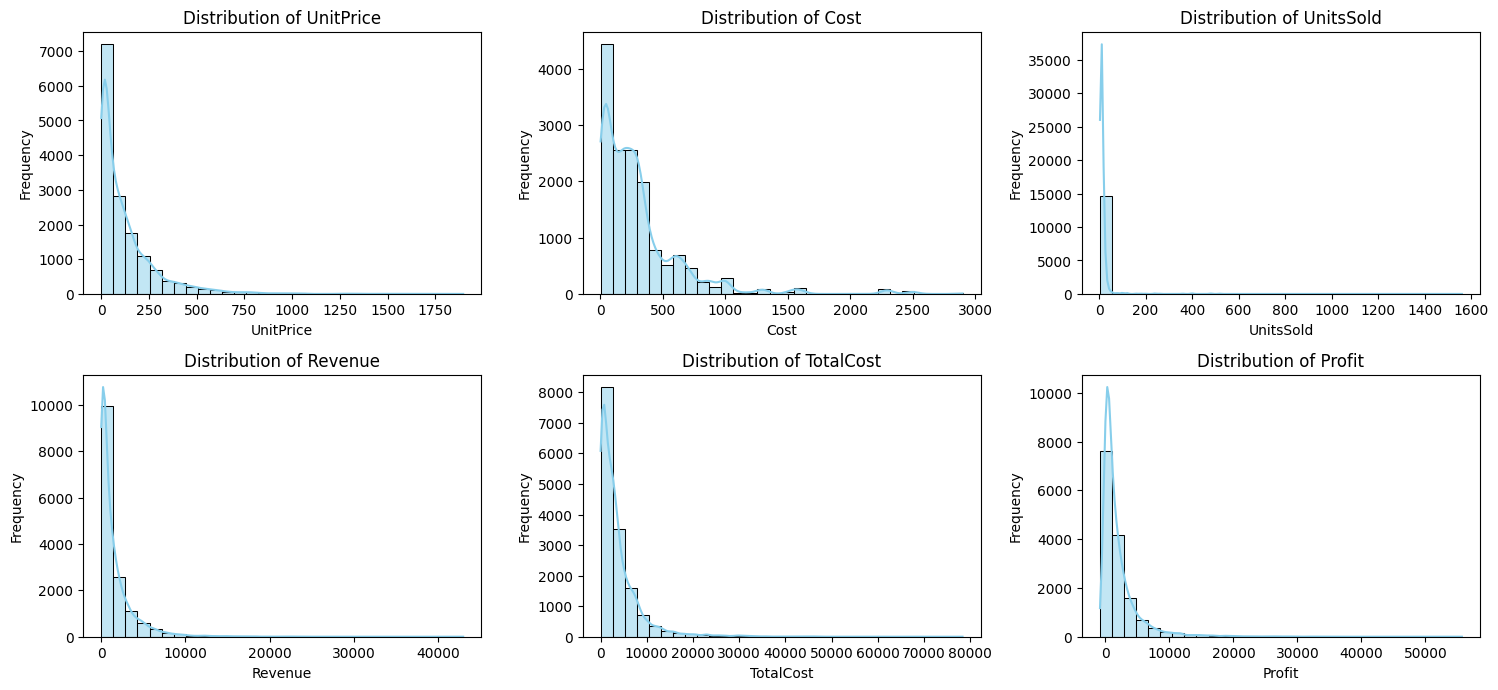

In [89]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

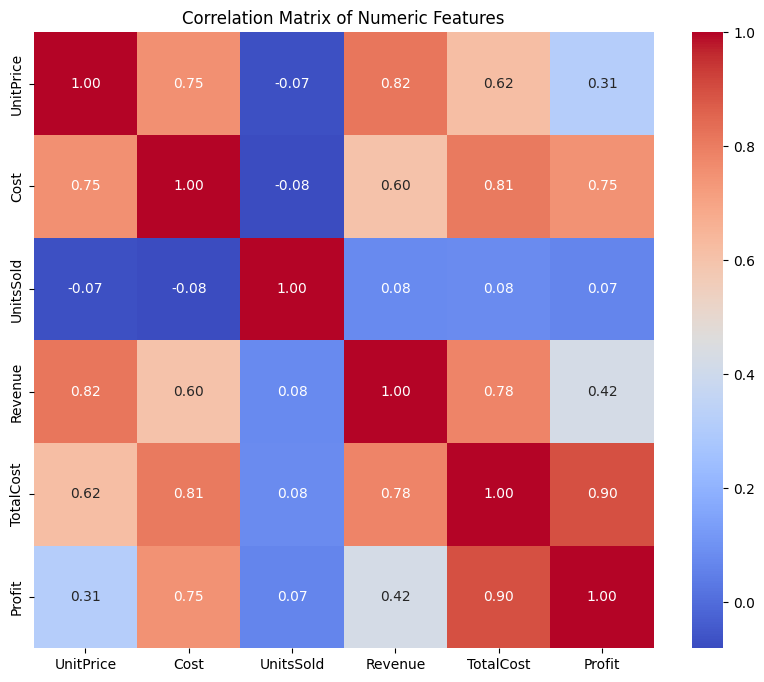

In [91]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

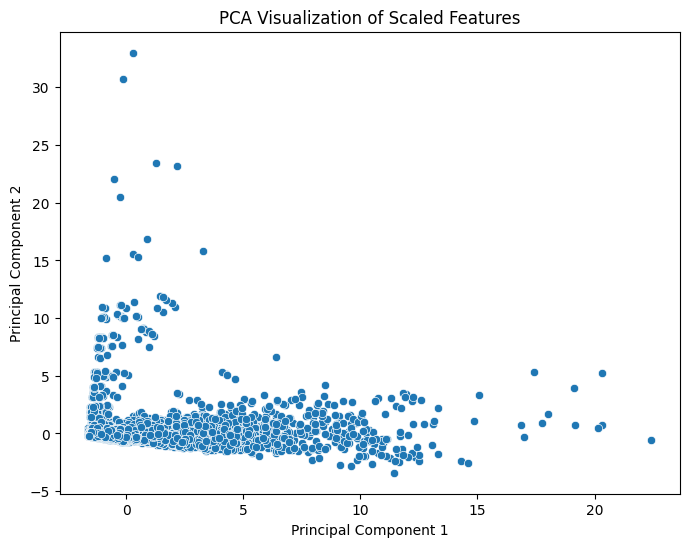

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_data, palette='viridis')
plt.title("PCA Visualization of Scaled Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [70]:
region_summary = data.groupby('Region').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalProfit=('Profit', 'sum')
).reset_index()


In [71]:
region_summary = region_summary.sort_values(by='TotalRevenue', ascending=False)


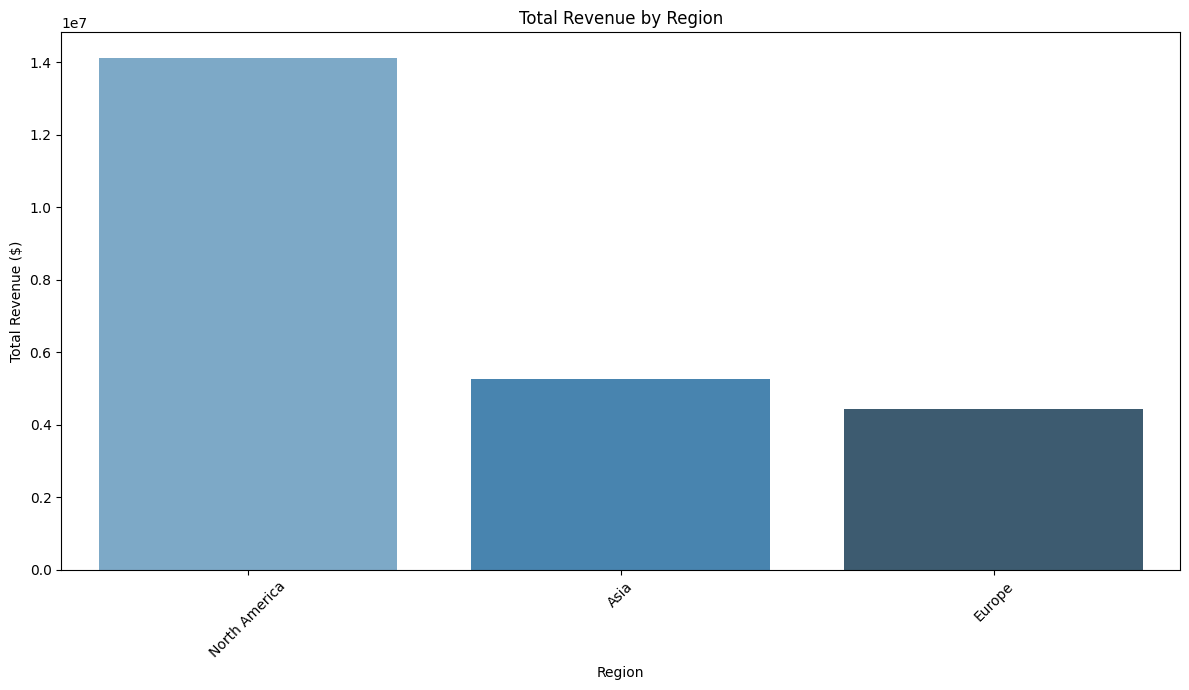

In [72]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Region', y='TotalRevenue', data=region_summary, palette='Blues_d')
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

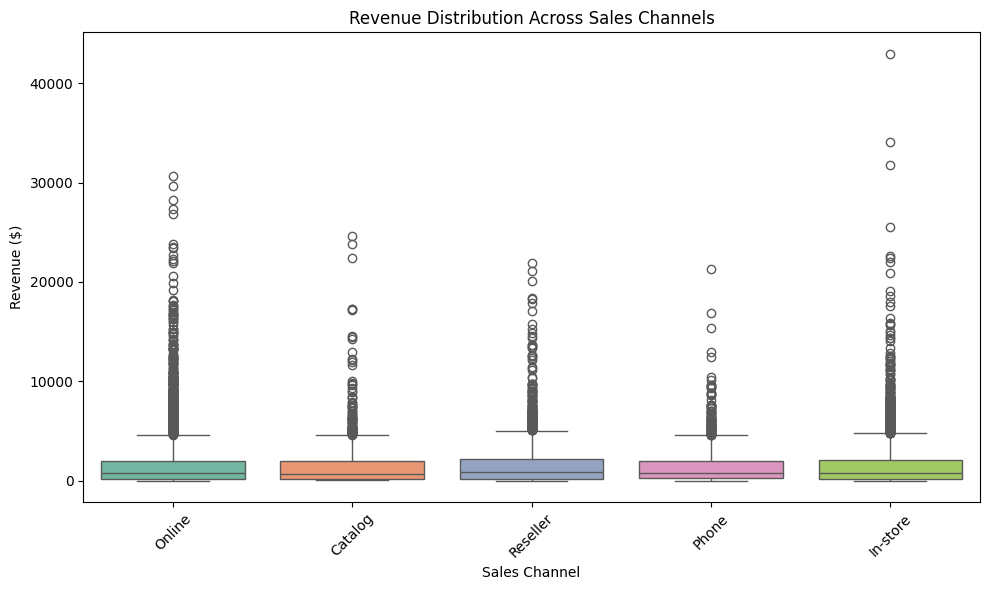

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalesChannel', y='Revenue', data=data, palette='Set2')
plt.title("Revenue Distribution Across Sales Channels")
plt.xlabel("Sales Channel")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

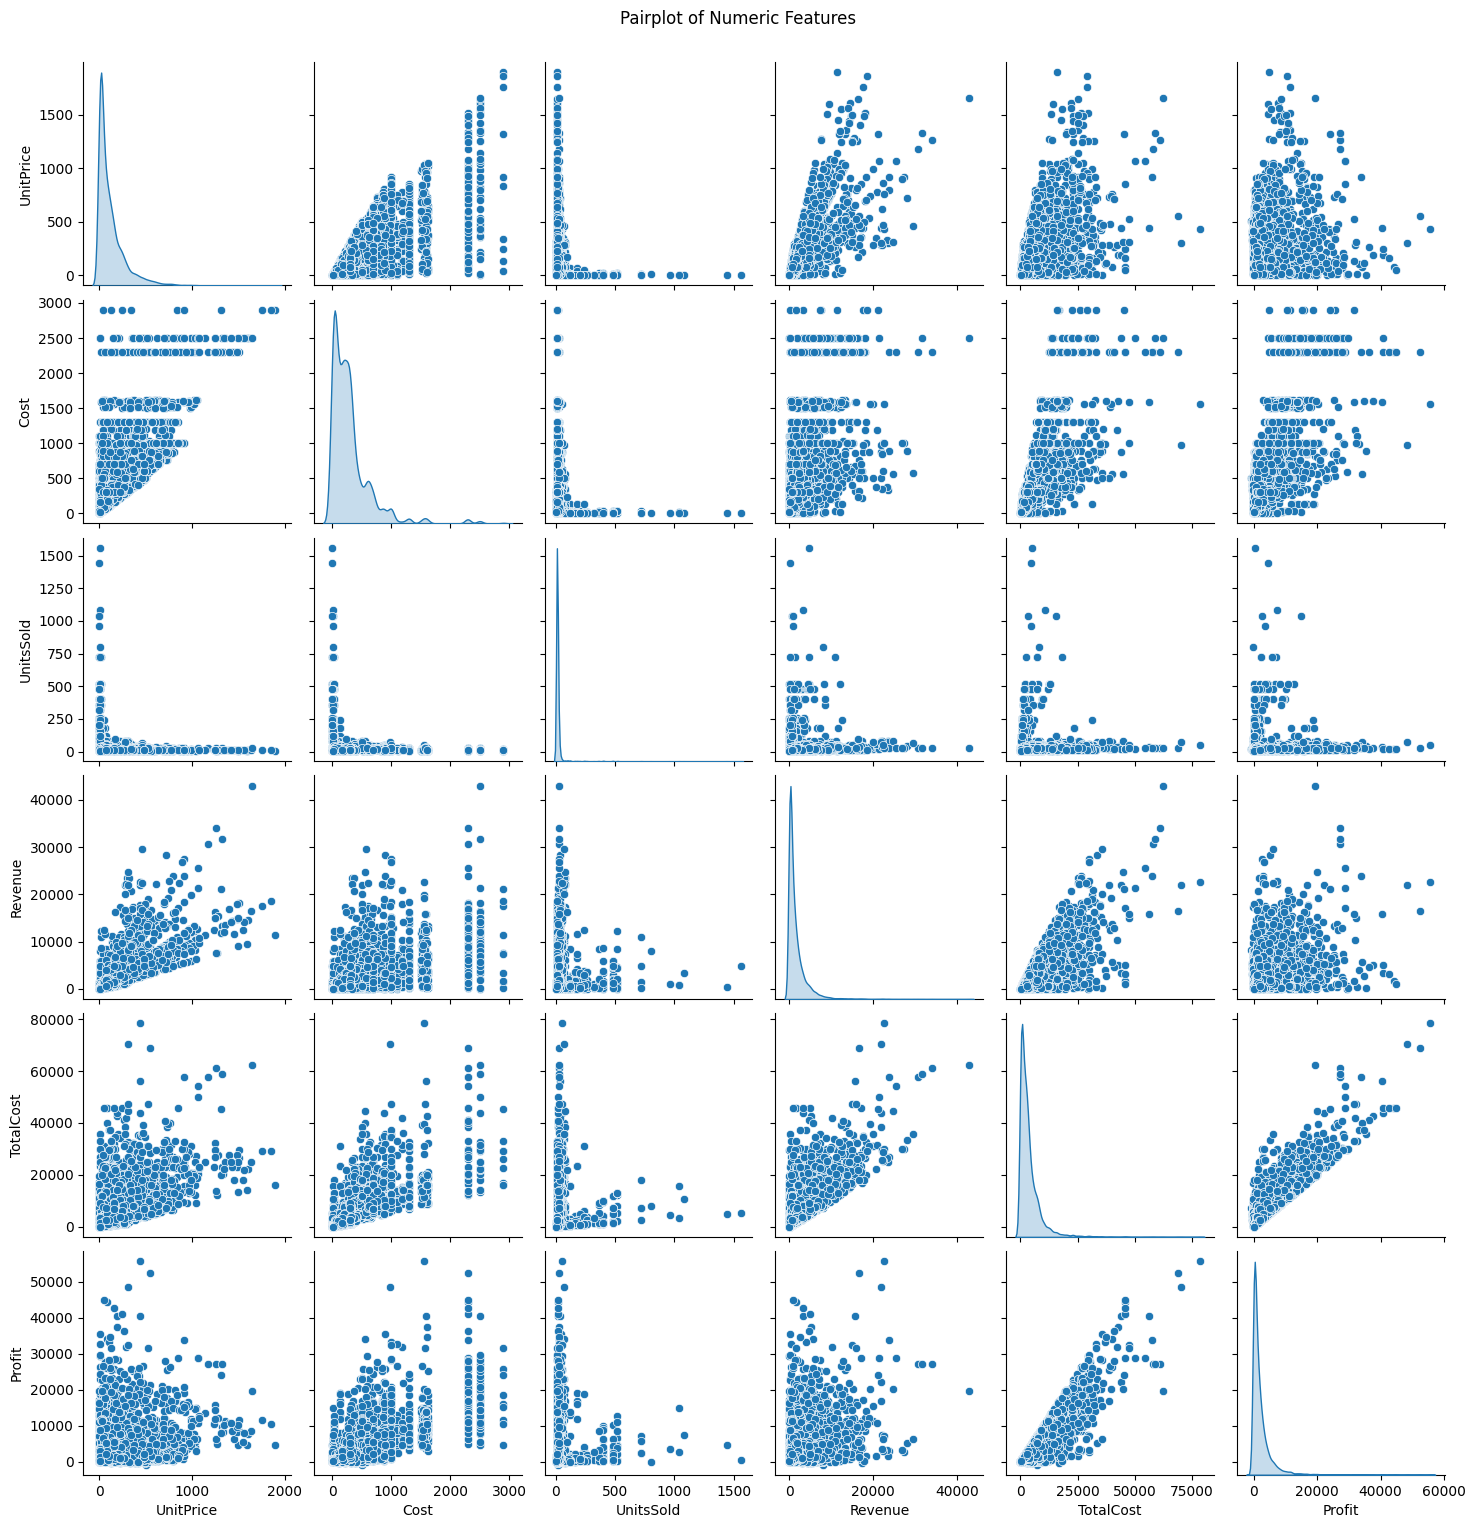

In [74]:
sns.pairplot(data[numeric_columns], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [75]:
country_summary = data.groupby('Country').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalUnitsSold=('UnitsSold', 'sum')
).reset_index()

In [96]:
country_summary = country_summary[country_summary['TotalRevenue'] > 0]



In [94]:
fig = px.scatter_geo(
    country_summary,
    locations="Country",
    locationmode="country names",
    size="TotalUnitsSold",
    color="TotalRevenue",
    hover_name="Country",
    projection="natural earth",
    title="Global Sales Distribution: Revenue and Units Sold",
    color_continuous_scale=px.colors.sequential.Plasma,
    size_max=40
)

In [95]:
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgreen",
        showocean=True,
        oceancolor="lightblue",
        showcountries=True,
        countrycolor="gray"
    ),
    title_font_size=24,
    title_x=0.5,
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)
